In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing basic python libraries
import pandas as pd
import numpy as np

# importing data visualisation libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import math
import seaborn as sns

# import scikit-learn split function
from sklearn.model_selection import train_test_split

# import K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# import scikit-learn module to encode classes into one-hot coding matrix
from sklearn.preprocessing import LabelEncoder

# import keras module
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

Using TensorFlow backend.


## Python code to load the dataset into a Pandas dataframe:

In [3]:
# Specify what and where is the data file
filename = 'pima_diabetes.csv'

In [4]:
# Specify the fields with their names
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [5]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(filename, names=col_names)

In [6]:
# sneak peek first few rows of data
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

## Preprocess the dataset, find and clean missing values

In [8]:
# mark zero values as missing or NaN
df[['plas','pres','skin','test','mass','pedi','age']]=df[['plas','pres','skin','test','mass','pedi','age']].replace(0,np.NaN)

In [9]:
# count the number of NaN values in each column
print(df.isnull().sum())

preg       0
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64


### it is good idea to delete all the rows contaiing 0 values as long the pecentage of removal data is not > 30% 
### delete NaN values or replace them using mean/median 

In [10]:
# checking percentage of unwanted data in dataset

def missing(df):
    print(df.isnull().sum() * 100/ len(df))

missing(df)

preg      0.000000
plas      0.651042
pres      4.557292
skin     29.557292
test     48.697917
mass      1.432292
pedi      0.000000
age       0.000000
class     0.000000
dtype: float64


In [11]:
# skin and test columns have considerable effect on data removal
# thus removing NaN values is not a good idea
# Instead replace the values with mean/median values

new_df=df.fillna(df.mean())
new_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


## Exploratory Data Analysis on the Dataset

In [12]:
# to check for null values
print(new_df.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [13]:
# get shape
new_df.shape

(768, 9)

In [14]:
# get datatype
new_df.dtypes

preg       int64
plas     float64
pres     float64
skin     float64
test     float64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [15]:
# get the summary statistics of numeric variables of the dataset
new_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# visualising the data: histograms

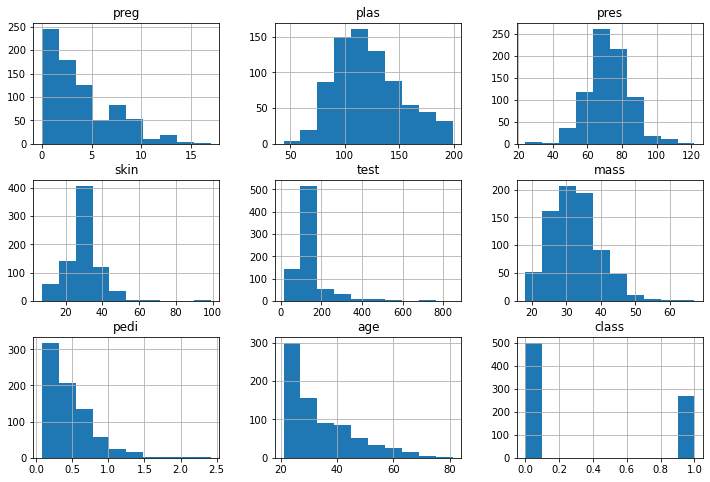

In [16]:
# plot histogram for each numeric variable
new_df.hist(figsize=(12,8))
plt.show()

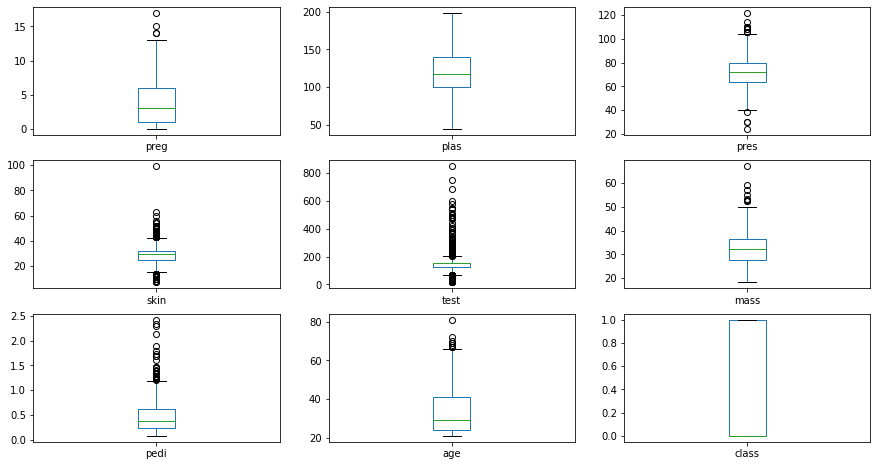

In [17]:
# box plots
new_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, legend=True,figsize=(15,8))
plt.show()

In [18]:
new_df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

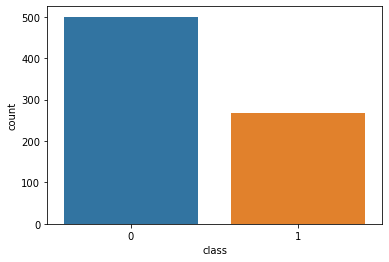

In [19]:
# plot the countplot for class column 
sns.countplot(new_df['class'])
plt.show()

# Healthy vs Diabetic by Pregnancy

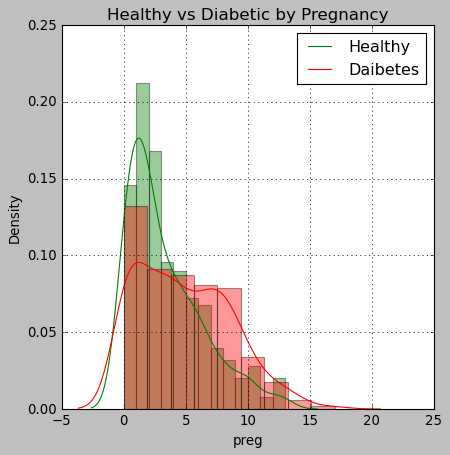

In [20]:
plt.style.use("classic")
plt.figure(figsize=(6,6))

sns.distplot(new_df.preg[new_df['class']==0], color = 'green') # Healthy - green
sns.distplot(new_df.preg[new_df['class']==1], color = 'red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Pregnancy', fontsize=15)
plt.legend(['Healthy','Daibetes'])
plt.grid(linewidth = 0.7)
plt.show()


# Healthy vs Diabetic by plasma Glucose concentration

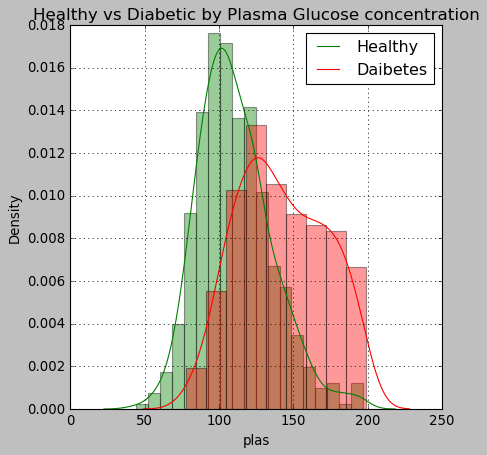

In [21]:
plt.style.use("classic")
plt.figure(figsize=(6,6))

sns.distplot(new_df.plas[new_df['class']==0], color = 'green') # Healthy - green
sns.distplot(new_df.plas[new_df['class']==1], color = 'red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Plasma Glucose concentration', fontsize=15)
plt.legend(['Healthy','Daibetes'])
plt.grid(linewidth = 0.7)
plt.show()


# Healthy vs Diabetic by Blood Pressure

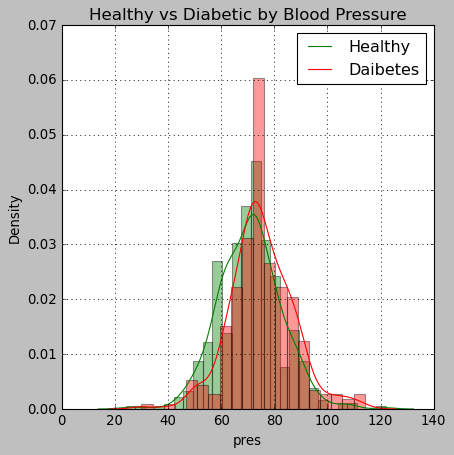

In [22]:
plt.style.use("classic")
plt.figure(figsize=(6,6))

sns.distplot(new_df.pres[new_df['class']==0], color = 'green') # Healthy - green
sns.distplot(new_df.pres[new_df['class']==1], color = 'red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Blood Pressure', fontsize=15)
plt.legend(['Healthy','Daibetes'])
plt.grid(linewidth = 0.7)
plt.show()


# Healthy vs Diabetic by skin thickness

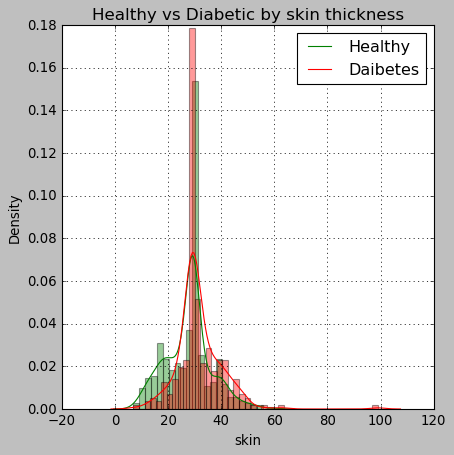

In [23]:
plt.style.use("classic")
plt.figure(figsize=(6,6))

sns.distplot(new_df.skin[new_df['class']==0], color = 'green') # Healthy - green
sns.distplot(new_df.skin[new_df['class']==1], color = 'red') # Diabetic - Red

plt.title('Healthy vs Diabetic by skin thickness', fontsize=15)
plt.legend(['Healthy','Daibetes'])
plt.grid(linewidth = 0.7)
plt.show()

# Healthy vs Diabetic by Insulin

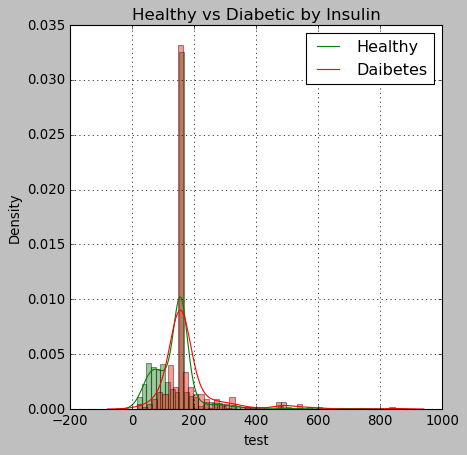

In [24]:
plt.style.use("classic")
plt.figure(figsize=(6,6))

sns.distplot(new_df.test[new_df['class']==0], color = 'green') # Healthy - green
sns.distplot(new_df.test[new_df['class']==1], color = 'red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Insulin', fontsize=15)
plt.legend(['Healthy','Daibetes'])
plt.grid(linewidth = 0.7)
plt.show()

# Healthy vs Diabetic by BMI

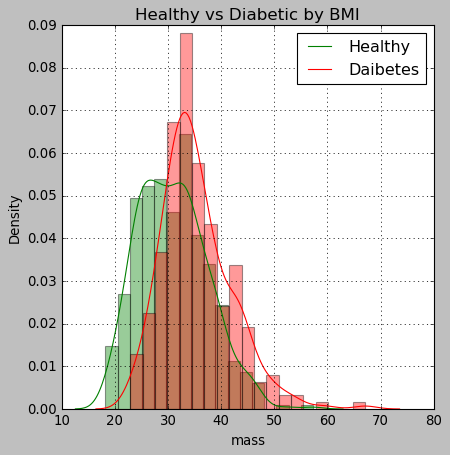

In [25]:
plt.style.use("classic")
plt.figure(figsize=(6,6))

sns.distplot(new_df.mass[new_df['class']==0], color = 'green') # Healthy - green
sns.distplot(new_df.mass[new_df['class']==1], color = 'red') # Diabetic - Red

plt.title('Healthy vs Diabetic by BMI', fontsize=15)
plt.legend(['Healthy','Daibetes'])
plt.grid(linewidth = 0.7)
plt.show()

# Healthy vs Diabetic by Diabetes Pedigree Function

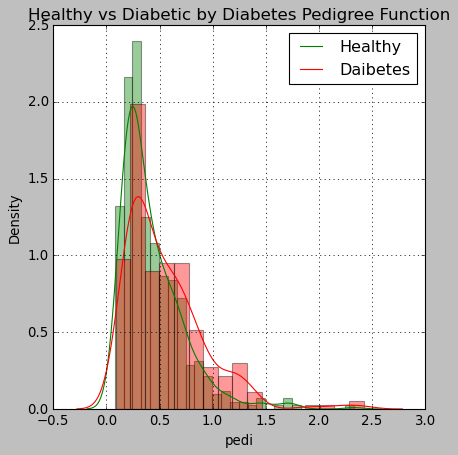

In [26]:
plt.style.use("classic")
plt.figure(figsize=(6,6))

sns.distplot(new_df.pedi[new_df['class']==0], color = 'green') # Healthy - green
sns.distplot(new_df.pedi[new_df['class']==1], color = 'red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Diabetes Pedigree Function', fontsize=15)
plt.legend(['Healthy','Daibetes'])
plt.grid(linewidth = 0.7)
plt.show()

# Healthy vs Diabetic by Age

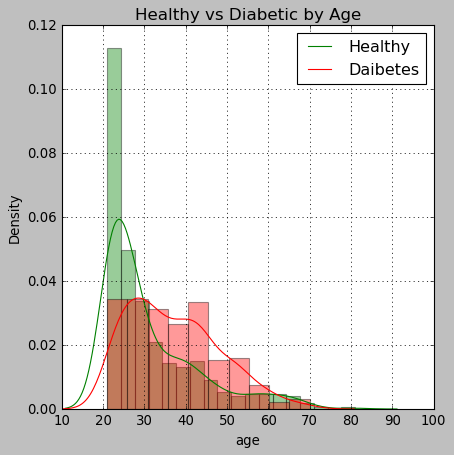

In [27]:
plt.style.use("classic")
plt.figure(figsize=(6,6))

sns.distplot(new_df.age[new_df['class']==0], color = 'green') # Healthy - green
sns.distplot(new_df.age[new_df['class']==1], color = 'red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Age', fontsize=15)
plt.legend(['Healthy','Daibetes'])
plt.grid(linewidth = 0.7)
plt.show()

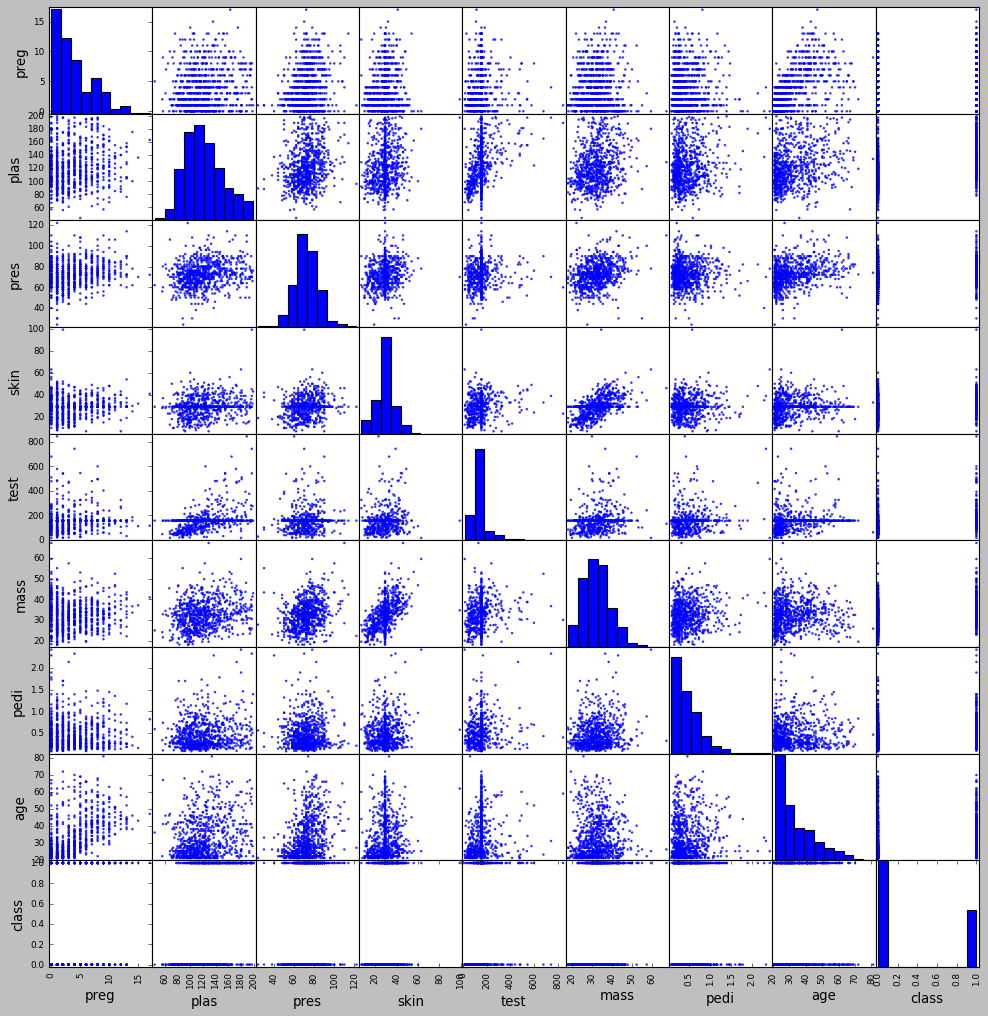

In [28]:
# scatter plot matrix
scatter_matrix(new_df, alpha=0.8, figsize=(15,15))
plt.show()

# seperate dataset into input and output arrays

In [29]:
array = new_df.values
X = array[:,0:8]
Y = array[:,-1]

In [30]:
X.shape

(768, 8)

In [31]:
Y.shape

(768,)

# split data into train ad test data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Encode Class Values - One-Hot Coding

In [33]:
#encode class values as integers
encoder_train = LabelEncoder()
encoder_train.fit(Y_train)
encoded_Y_train = encoder_train.transform(Y_train)

#convert integers into one-hot coding format
onehot_Y_train = np_utils.to_categorical(encoded_Y_train)

#----------
#encode class values as integers
encoder_test = LabelEncoder()
encoder_test.fit(Y_test)
encoded_Y_test = encoder_test.transform(Y_test)

#convert integers into one-hot coding format
onehot_Y_test = np_utils.to_categorical(encoded_Y_test)

In [34]:
onehot_Y_train.shape

(514, 2)

In [35]:
onehot_Y_test.shape

(254, 2)

# MLP with Keras

In [36]:
# define a function to create a baseline model
# the network: 2-layered MLP = INPUT neurons + 1 hidden layer + OUTPUT layer
# optimization algorith: the adam
# loss function : cross entropy

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=8, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [37]:
# create the model
model = baseline_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


# train the model

In [39]:
# train the model
model.fit(X_train, onehot_Y_train, epochs=150, batch_size=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/150
514/514 [==============================] - 1s 2ms/step - loss: 9.9319 - accuracy: 0.3521
Epoch 2/150
514/514 [==============================] - 0s 176us/step - loss: 9.9043 - accuracy: 0.3521
Epoch 3/150
514/514 [==============================] - 0s 174us/step - loss: 9.8996 - accuracy: 0.3541
Epoch 4/150
514/514 [==============================] - 0s 176us/step - loss: 9.7209 - accuracy: 0.3560
Epoch 5/150
514/514 [==============================] - 0s 174us/step - loss: 5.8176 - accuracy: 0.5623
Epoch 6/150
514/514 [==============================] - 0s 178us/step - loss: 4.3498 - accuracy: 0.6323
Epoch 7/150
514/514 [==============================] - 0s 179us/step - loss: 3.7757 - accuracy: 0.6148
Epoch 8/150
514/514 [==============================] - 0s 179us/step - loss: 3.3906 - accuracy: 0.6109
Epoch 9/150
514/514 [==============================] - 0s 181us/step - loss: 3.0061

## Evaluate model with K-Fold cross validation

In [40]:
# create kerasClassifier to evaluate the model
evaluator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)

In [41]:
# evaluate the model
kfold = KFold(n_splits=10, shuffle = True, random_state=42)

In [42]:
# using k-fold cross validation to evaluate the model
results = cross_val_score(evaluator, X_test, onehot_Y_test, cv=kfold)

print("baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200
228/228 [==============================] - 1s 3ms/step - loss: 10.2527 - accuracy: 0.3333
Epoch 2/200
228/228 [==============================] - 0s 367us/step - loss: 10.2527 - accuracy: 0.3333
Epoch 3/200
228/228 [==============================] - 0s 353us/step - loss: 10.2527 - accuracy: 0.3333
Epoch 4/200
228/228 [==============================] - 0s 359us/step - loss: 10.2527 - accuracy: 0.3333
Epoch 5/200
228/228 [==============================] - 0s 382us/step - loss: 10.2527 - accuracy: 0.3333
Epoch 6/200
228/228 [==============================] - 0s 356us/step - loss: 10.2527 - accuracy: 0.3333
Epoch 7/200
228/228 [==============================] - 0s 360us/step - loss: 10.2527 - accuracy: 0.3333
Epoch 8/200
228/228 [==============================] - 0s 366us/step - loss: 10.2527 - accuracy: 0.3333
Epoch 9/200
228/228 [==============================] - 0s 371us/step - loss: 10.2527 - accuracy: 0.3333
Epoch 10/200
228/228 [==============================] - 0s 348us/s

# Final Training and Validation Accuracy

In [43]:
#training accuracy
trainng_scores = model.evaluate(X_train, onehot_Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], trainng_scores[1]*100))

514/514 [==============================] - 0s 402us/step

accuracy: 72.96%


In [44]:
#validation accuracy
test_scores = model.evaluate(X_test, onehot_Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], test_scores[1]*100))

254/254 [==============================] - 0s 40us/step

accuracy: 70.47%
